## Project (E) 448
## Linear Regression - Multi-Dimensional Predictive Distribution
## Demonstration: Wine Quality Data Set
### Daniël S. van der Westhuizen
### 17158680

In [19]:
import numpy as np
import pylab as pl
from numpy.linalg import inv
from functions import *

So, now that I have confirmed that my code works on this synthetic data set, let me try it on real world data sets. The data sets should not have many dimensions or the algorhithm's computation time will be too long. For example, just setting up basis function means (for M=9) for data with 9 or more dimensions returns a memory error and takes very long for 8.

I decided to try it with the wine quality data set. It lists the properties of various wine products and a rating out of 10 for each of these.

In [28]:
from numpy import loadtxt
lines = loadtxt("winequality-red-shuffled.csv", comments="#", delimiter=";", unpack=False)
lines

array([[  8.5 ,   0.34,   0.44, ...,   0.63,  10.7 ,   5.  ],
       [  6.4 ,   0.57,   0.14, ...,   0.48,   9.2 ,   5.  ],
       [  6.4 ,   0.36,   0.53, ...,   0.93,  12.4 ,   6.  ],
       ..., 
       [  6.7 ,   0.42,   0.27, ...,   0.57,  11.3 ,   6.  ],
       [  9.3 ,   0.4 ,   0.49, ...,   0.55,   9.4 ,   5.  ],
       [  7.1 ,   0.61,   0.02, ...,   0.6 ,   9.7 ,   6.  ]])

In [29]:
#Normalization
for a in range(0,11):
    lines[:,a] = (lines[:,a] - np.average(lines[:,a])) / (np.average(np.abs(lines[:,a])))

In [30]:
lines

array([[  2.16791575e-02,  -3.55841632e-01,   6.23762376e-01, ...,
         -4.27697220e-02,   2.65775050e-02,   5.00000000e+00],
       [ -2.30735693e-01,   7.99125577e-02,  -4.83348335e-01, ...,
         -2.70681693e-01,  -1.17335229e-01,   5.00000000e+00],
       [ -2.30735693e-01,  -3.17949964e-01,   9.55895590e-01, ...,
          4.13054220e-01,   1.89678604e-01,   6.00000000e+00],
       ..., 
       [ -1.94676429e-01,  -2.04274957e-01,  -3.60036004e-03, ...,
         -1.33934510e-01,   8.41425987e-02,   6.00000000e+00],
       [  1.17837196e-01,  -2.42166626e-01,   8.08280828e-01, ...,
         -1.64322773e-01,  -9.81468648e-02,   5.00000000e+00],
       [ -1.46597410e-01,   1.55695895e-01,  -9.26192619e-01, ...,
         -8.83521162e-02,  -6.93643179e-02,   6.00000000e+00]])

I will use only six of the attributes so that not too much computation is needed

In [31]:
train_N = 50
test_N = 100

train_x = lines[:train_N,:5]
train_y = lines[:train_N,11]
test_x = lines[train_N:train_N+test_N,:5]
test_y = lines[train_N:train_N+test_N,11]

alpha = 1
beta = 5
s = 0.2

Do further reduce computation time, I limit the number of basis functions I use (5^Dimension).

In [24]:
D = 5 #input dimensionality
M = 3 #basis function ticks for each dimension (i.e. M^D basis functions)
means = np.zeros((M**D,D))
done = 0
mu_vector_amount = M**D
row_count = 0
column_count = 0
for a in range(0,mu_vector_amount*D):
    means[row_count,column_count] = ( (row_count//(M**column_count))%M*2/(M-1)) - 1
    row_count += 1
    if (row_count == mu_vector_amount):
        row_count = 0
        column_count += 1

In [25]:
design_matrix = np.zeros((1000,M**D))
for a in range(0,M**D):
    for b in range(0,1000):
        design_matrix[b,a] = basis(train_x[b,:],means[a,:],s)
S_N = inv( alpha*(np.identity(M**D)) + beta*np.dot(design_matrix.transpose(),design_matrix) )
m_N = beta * (   np.dot( np.dot(S_N,design_matrix.transpose()), np.atleast_2d(train_y).transpose() ) )

In [26]:
pred_means = np.zeros(np.shape(test_x)[0])
for b in range(0,np.shape(test_x)[0]):
    
    phi_vector_pred = np.zeros(M**D)
    for a in range(0,M**D):
        phi_vector_pred[a] = basis(test_x[b,:],means[a],s)
    phi_vector_pred = np.atleast_2d(phi_vector_pred).transpose()

    pred_means[b] = np.dot( m_N.transpose(), phi_vector_pred )

Despite the limitations I made, that prediction took about a minute to be computed. Also, the limitations had a price, because as shown below, the mean predictions deviate from the actual value by 11%.

To-Do: Calculate the probability of the actual ratings.

In [27]:
print("average of the predicted ratings:",np.average(pred_means))
print("average of the actual ratings:",np.average(test_y))

average of the predicted ratings: 1.53244039123
average of the actual ratings: 5.70401337793


In [32]:
error_array = np.zeros(3)
test_pred_error_vari_array = np.zeros(3)
calc_time_array = np.zeros(3)
for a in range(3,6):
    q,w,e,r,t = lin_reg_pred_distrib(train_x,train_y,test_x,test_y,a,alpha,beta,s)
    error_array[a-3] = e
    test_pred_error_vari_array[a-3] = r
    calc_time_array[a-3] = t

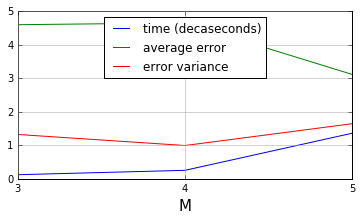

In [33]:
%matplotlib inline
pl.figure(figsize=(6,3))
plot_x = np.linspace(0,2,3) + 3
pl.plot(plot_x,calc_time_array/10,label='time (decaseconds)')
pl.plot(plot_x,error_array,label='average error')
pl.plot(plot_x,test_pred_error_vari_array,label='error variance')
pl.legend(loc='upper center')
pl.xlabel('M', fontsize=15)
pl.locator_params(axis = 'x', nbins = 2)
pl.grid(b=True, which='both', color='0.65',linestyle='-')